In [1]:
from utils import process_frame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython

from scipy.io import wavfile
import scipy.signal.windows as windows

In [2]:
fs, s = wavfile.read('../samples/arctic_b0443.wav')
s = s/np.max(s)

In [5]:
# Read input signal
IPython.display.Audio(s,rate=fs)

In [80]:
# Main parameters : order of the filter, size of the frames
frame_size = 400

# Overlap : the choice of analysis and synthesis windows is as in the STFT course
# Careful that it is only consistent for a 50% overlap
overlap_ratio = 0
overlap = int(overlap_ratio*frame_size)
w_a = windows.cosine(frame_size)
w_s = windows.cosine(frame_size)

# Compute the number of frames and pad the input signal at the end with zeros
# to work only with full frames
nframes = int(np.ceil((len(s)-overlap)/(frame_size-overlap)))
nframes

160

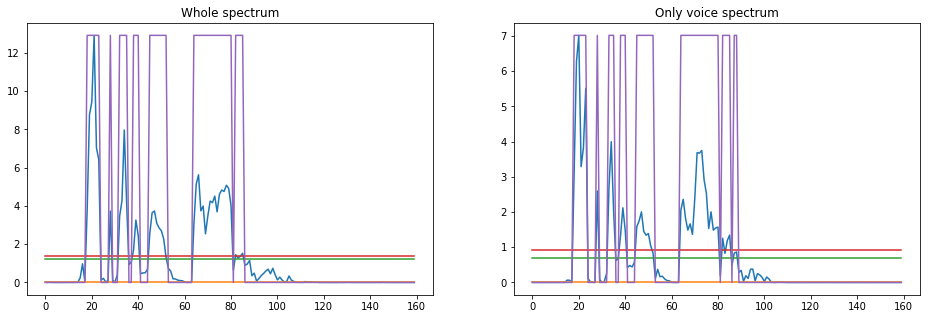

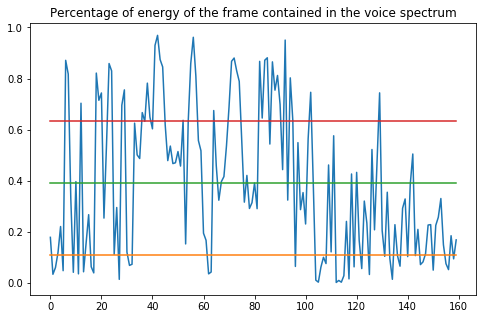

In [55]:
results1 = []
results2 = []
for frame in range(0,nframes):
    start = frame*frame_size
    end = start+frame_size
    
    N = 128
    S = np.fft.fftshift(np.fft.fft(s[start:end], n=N))
    S = S[int(N/2):]
    #Y = Y[1:4]
    NRJ1 = np.sum(np.abs(S)**2/N)
    NRJ2 = np.sum(np.abs(S[1:4])**2/N)
    #if NRJ >= E_min :
    #    results.append(1)
    #else :
    #    results.append(0)
    results1.append(NRJ1)
    results2.append(NRJ2)


"""ind = np.array([ind for ind, values in enumerate(results) if values == 1])
speech_init = [ind[0]]
speech_end = []
for i, indice in enumerate(ind) :
    if i < len(ind) -1 :
        if indice + 1 != ind[i+1] :
            speech_end.append(indice)
            speech_init.append(ind[i+1])
    else :
        speech_end.append(indice)
print(np.array(speech_init)*frame_size/(2*fs))
print(np.array(speech_end)*frame_size/(2*fs))"""

fig, ax = plt.subplots(1, 2, figsize=[16, 5])

"""fig = plt.figure(figsize=[16, 12])
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(results1)

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(results2)

ax3 = fig.add_subplot(gs[1, 0:])
ax3.plot(np.array(results2)/np.array(results1))

gs.update(wspace=0.5, hspace=0.5)"""

# Plot the NRJ of each frame
ax[0].plot(results1)
ax[0].plot(np.percentile(results1, 25)*np.ones(len(results1))) # 1st quartile
ax[0].plot(np.mean(results1)*np.ones(len(results1)))           # median
ax[0].plot(np.percentile(results1, 75)*np.ones(len(results1))) # 3rd quartile
ax[0].plot((results1 > np.mean(results1))*max(results1))
ax[0].set_title('Whole spectrum')

ax[1].plot(results2)
ax[1].plot(np.percentile(results2, 25)*np.ones(len(results2))) # 1st quartile
ax[1].plot(np.mean(results2)*np.ones(len(results2)))           # median
ax[1].plot(np.percentile(results2, 75)*np.ones(len(results2))) # 3rd quartile
ax[1].plot((results2 > np.mean(results2))*max(results2))
ax[1].set_title('Only voice spectrum')

plt.show()

# Plot percentage of the NRJ contained in the voice spectrum
percentage = np.array(results2)/np.array(results1)
fig, ax = plt.subplots(1, 1, figsize=[8, 5])
ax.plot(percentage)
ax.plot(np.percentile(percentage, 25)*np.ones(len(percentage))) # 1st quartile
ax.plot(np.mean(percentage)*np.ones(len(percentage)))           # median
ax.plot(np.percentile(percentage, 75)*np.ones(len(percentage))) # 3rd quartile
ax.set_title('Percentage of energy of the frame contained in the voice spectrum')

plt.show()

Full-band energy = 0.012110601445312497
Subband energy = 0.0007434702092957808


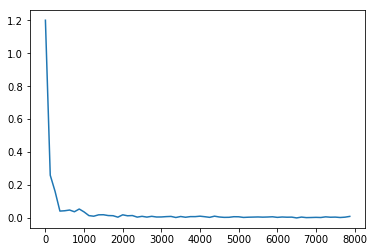

In [35]:
frame = 2
start = frame*frame_size
end = start+frame_size

N = 128
S = np.fft.fftshift(np.fft.fft(s[start:end], n=N))
S = S[int(N/2):]

freq = np.fft.fftshift(np.fft.fftfreq(N))*fs
freq = freq[int(N/2):]
plt.plot(freq, np.abs(S))

fullband_nrj = np.sum(np.abs(S)**2/N)
subband_nrj = np.sum(np.abs(S[1:4])**2/N)
print('Full-band energy = {}'.format(fullband_nrj))
print('Subband energy = {}'.format(subband_nrj))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

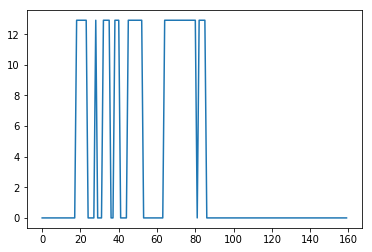

In [64]:
plt.plot((results1 > np.mean(results1))*max(results1))


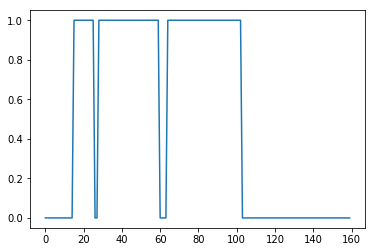

In [148]:
temp_results = results2
threshold = np.percentile(percentage, 25)/10
list_results = ((temp_results > threshold)*1)
final_decision = 0#list_results[0]
for ind, vad_res in enumerate(list_results[1:-1]) :
    vad_prev = list_results[ind]
    vad_next = list_results[ind+2]
    smoothed_res = np.median([vad_prev, vad_res, vad_next])
    final_decision = np.append(final_decision, smoothed_res)
    #print('ind {} : Previous = {}, Current = {}, Next = {}, Smoothed = {}'.format(ind+1, vad_prev, vad_res, vad_next, smoothed_res))

final_decision = np.append(final_decision, list_results[-1])
plt.plot(final_decision)

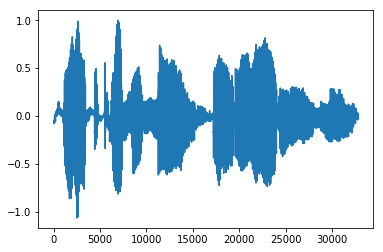

In [149]:
ind = np.array([ind for ind, values in enumerate(final_decision) if values == 1])
vad_signal = []
for i in ind :
    start = i*frame_size
    end = start+frame_size
    vad_signal = np.append(vad_signal, s[start:end])
plt.plot(vad_signal)

In [150]:
IPython.display.Audio(vad_signal,rate=fs)